# Ridge Regression

When the numerical features of the data in question are collinear, there arises a few issues of numerical instability and generalization. Ordinary least squares does not handle this well and in order to mitigate this we add a regularization term that penalizes data points that may represent outliers in the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [21]:
#This regression method is more apt for when a certain data point is an anomaly and may skew the results
#we add a reguralization paramater that helps control that
import numpy as np
def RidgeRegression(A,b,lambda_):
    #lambda_ here is the reguralization parameter,also solving Ax=b
    n, m = A.shape
    I = np.identity(m)
    x= np.dot(np.dot(np.linalg.inv(np.dot(A.T, A) + lambda_ * I), A.T), b)
    return x

Creating the data set below

In [41]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

# Note on Mean sqared error (MSE)
The MSE is a measure of the quality of an estimator. It calculates the mean squared difference across two quantities. The mean squared error is never negative, and the closer to zero, the better the estimate 

In [42]:
def MSE(y_true,y_predicted):
    return (1/len(y_true))*np.sum((np.subtract(y_true,y_predicted))**2)

Let us first visualize the data, the noise is not very high in this sample

Text(0.5,1,'Visualizing the data')

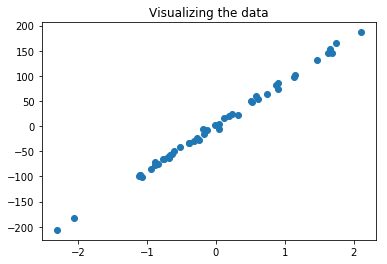

In [43]:
plt.scatter(X, y)
plt.title("Visualizing the data")

Now let us plot our estimate using various penalty coefficients

The mean squared error using the penalty coefficient 0 is 17.779274002775864
The mean squared error using the penalty coefficient 1 is 21.025088343365702
The mean squared error using the penalty coefficient 5 is 86.92923432921926
The mean squared error using the penalty coefficient 10 is 248.0104499012563
The mean squared error using the penalty coefficient 25 is 919.8665198890254
The mean squared error using the penalty coefficient 50 is 2006.3785724573142


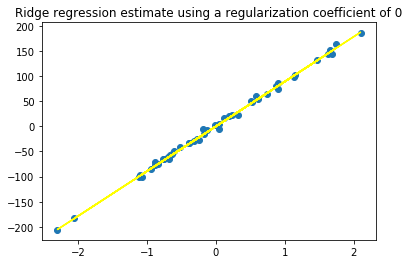

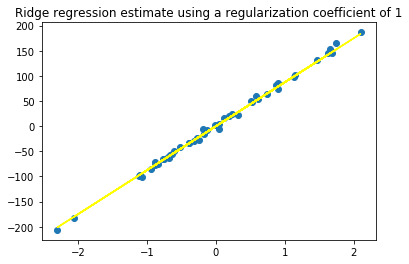

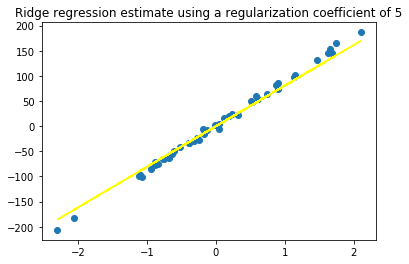

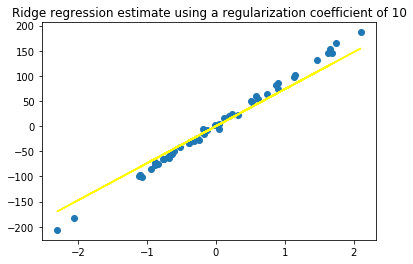

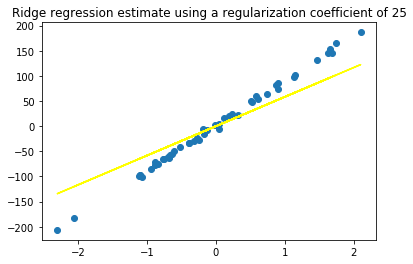

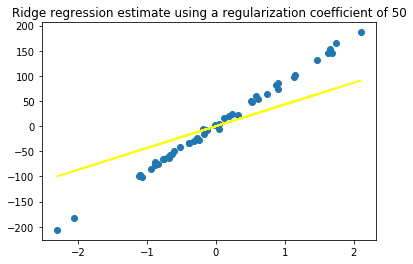

In [60]:
lambdas= [0,1,5,10,25,50]
for lambda_ in lambdas:
    w= RidgeRegression(X,y,lambda_)
    pred_y= np.matmul(X,w)
    plt.figure()
    plt.title("Ridge regression estimate using a regularization coefficient of " + str(lambda_))
    plt.scatter(X, y)
    plt.plot(X, pred_y, c='yellow')
    mse= MSE(y,pred_y)
    print("The mean squared error using the penalty coefficient " + str(lambda_) + " is " + str(mse) )

So what's going on here, since the noise in the data set isn't very high, the regularization coefficent seems to being doing very little as it increases, at in unecessarily penalizes points that should't be penalized, but now, let us really increase the noise in the data set through outliers and observes what occurs.

In [75]:
x, Y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=100,
    coef=True,
    random_state=1
)

Text(0.5,1,'Visualizing the data')

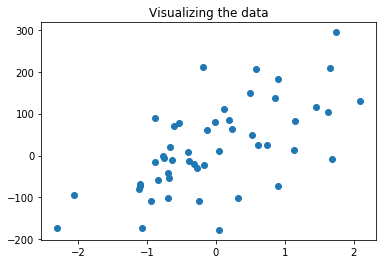

In [76]:
plt.scatter(x, Y)
plt.title("Visualizing the data")

As we can now see the data set is much noiser, let us see how our reguralization paramters perform now.

The mean squared error using the penalty coefficient 0 is 7111.709601110346
The mean squared error using the penalty coefficient 1 is 7113.601151011548
The mean squared error using the penalty coefficient 5 is 7152.007839671916
The mean squared error using the penalty coefficient 10 is 7245.880478531952
The mean squared error using the penalty coefficient 25 is 7637.415282884599
The mean squared error using the penalty coefficient 50 is 8270.59745229904


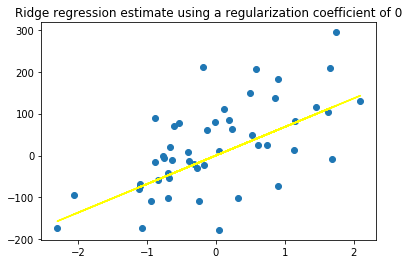

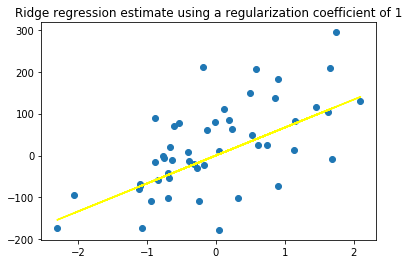

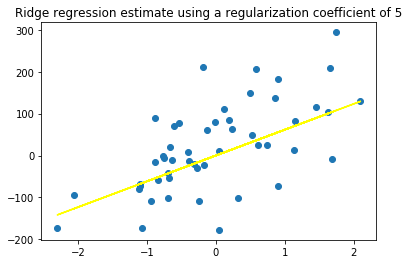

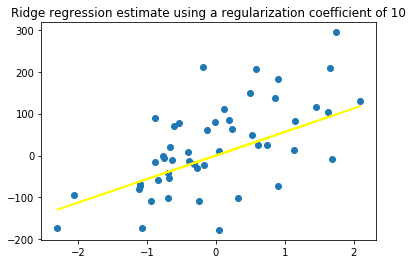

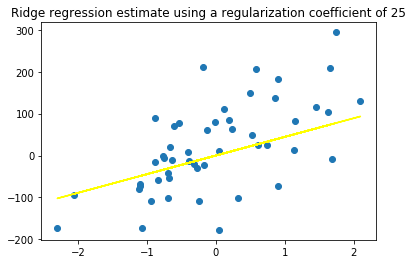

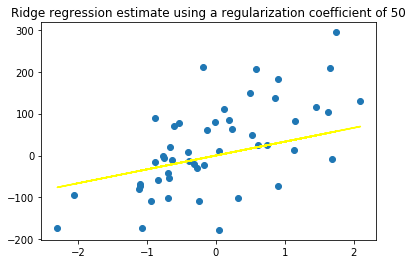

In [77]:
lambdas= [0,1,5,10,25,50]
for lambda_ in lambdas:
    w= RidgeRegression(x,Y,lambda_)
    pred_y= np.matmul(x,w)
    plt.figure()
    plt.title("Ridge regression estimate using a regularization coefficient of " + str(lambda_))
    plt.scatter(x, Y)
    plt.plot(x, pred_y, c='yellow')
    mse= MSE(Y,pred_y)
    print("The mean squared error using the penalty coefficient " + str(lambda_) + " is " + str(mse) )

As we can know see the regularization parameters offer similar peformance in the case of increased noise, however, a highere reguralization paramter is not necessarily better, let us look at one last data set, with relatively homogenous data, with a few outliers

In [119]:
X, Y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=10,
    coef=True,
    random_state=1
)

Text(0.5,1,'Visualizing the data')

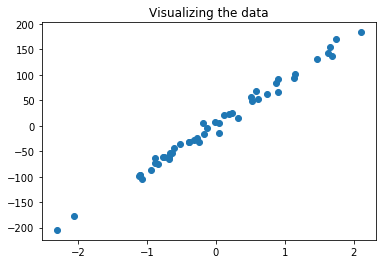

In [120]:
plt.scatter(X, Y)
plt.title("Visualizing the data")

In [121]:
Y= np.append(Y,[200,-150])
X= np.append(X,[-2,1.5])
X= np.expand_dims(X,axis=1)
print(np.shape(X))
print(np.shape(Y))

(52, 1)
(52,)


Text(0.5,1,'Visualizing the data')

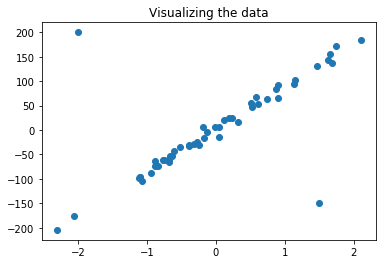

In [122]:
plt.scatter(X, Y)
plt.title("Visualizing the data")

So now, we have some definitive outliers, let us us see hwat our regularization coefficients do now

The mean squared error using the penalty coefficient 0 is 3822.9132381893432
The mean squared error using the penalty coefficient 1 is 3824.4303500563256
The mean squared error using the penalty coefficient 5 is 3855.8140551973747
The mean squared error using the penalty coefficient 10 is 3934.5434909947685
The mean squared error using the penalty coefficient 25 is 4278.859367887072
The mean squared error using the penalty coefficient 50 is 4870.67713942584


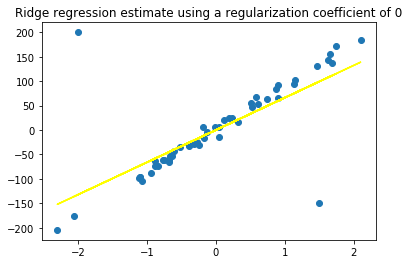

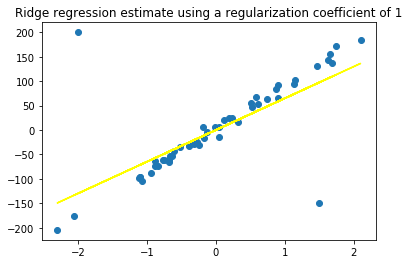

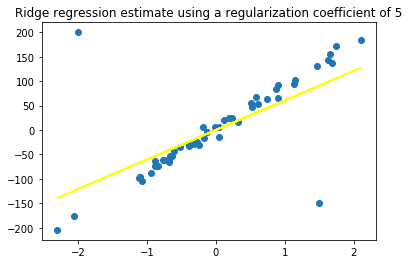

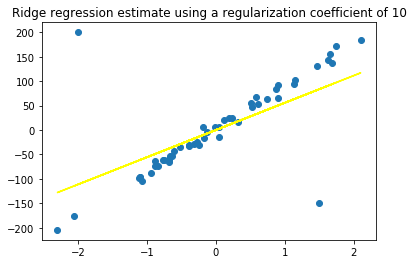

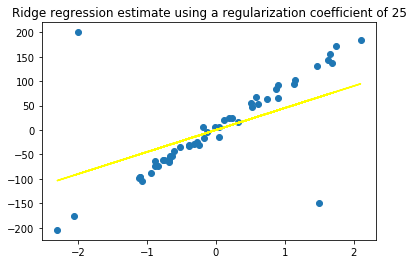

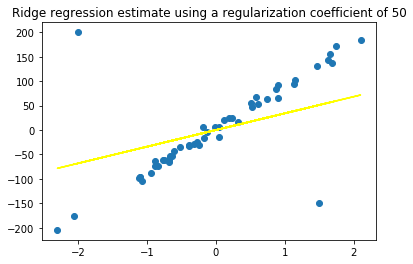

In [123]:
lambdas= [0,1,5,10,25,50]
for lambda_ in lambdas:
    w= RidgeRegression(X,Y,lambda_)
    pred_y= np.matmul(X,w)
    plt.figure()
    plt.title("Ridge regression estimate using a regularization coefficient of " + str(lambda_))
    plt.scatter(X, Y)
    plt.plot(X, pred_y, c='yellow')
    mse= MSE(Y,pred_y)
    print("The mean squared error using the penalty coefficient " + str(lambda_) + " is " + str(mse) )